### Visualize Generated EEGs ###

In [142]:
%matplotlib inline

In [143]:
import torch
import sys
import numpy as np
import mne
from mne.datasets import sample
import matplotlib.pyplot as plt
import h5py

In [144]:
sys.path.append("./forward_model/")
import stacklineplot

In [145]:
def load_eeg_file(filename):
    hdf = h5py.File(filename, "r")
    rec = hdf["record-0"]
    signals = rec["signals"]
    return signals

### Visualizations

In [146]:
i = 7

In [147]:
# plot 10s epochs (multiples in DE)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

n_sensors = 44
fs_gen = 200

electrode_labels = list(range(n_sensors))
ch0, ch1 = (0,19)
DE =5 # how many 10s epochs to display
epoch = 0; ptepoch = 10*int(fs_gen)
dp = 0 # int(0.5*ptepoch) # offset 
# print(np.shape(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp][1]))

#### A Real EEG

In [148]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(i) + "-real-rG-long.npy"

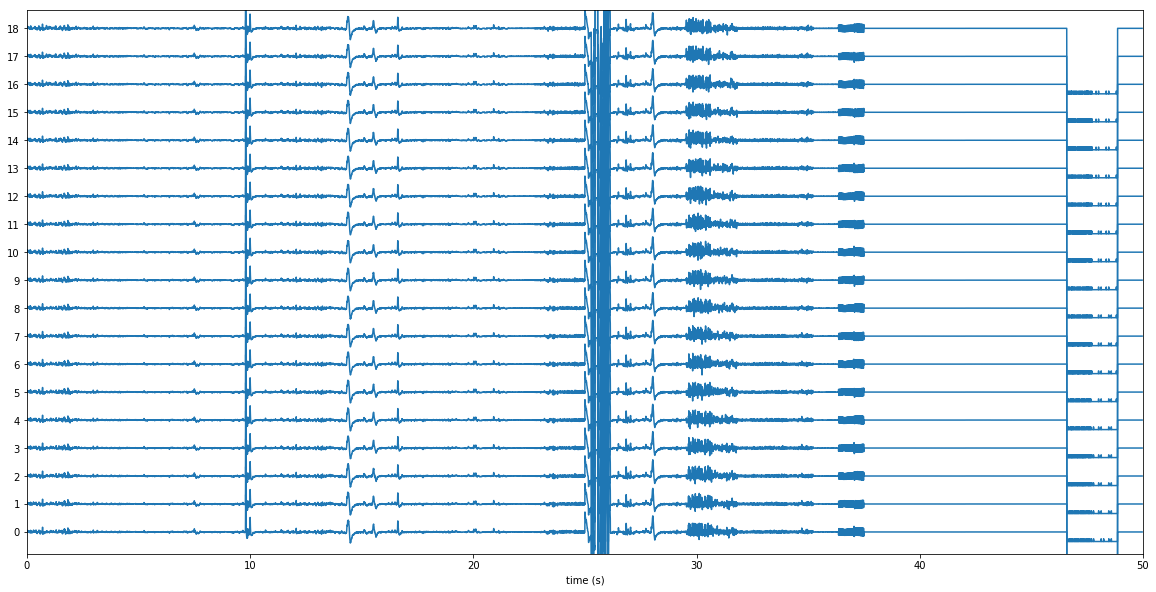

In [149]:
signals = np.load(filename).T
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=3.0)

Sample from one Epoch Before

In [150]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(i-1) + "-real-rG-long.npy"

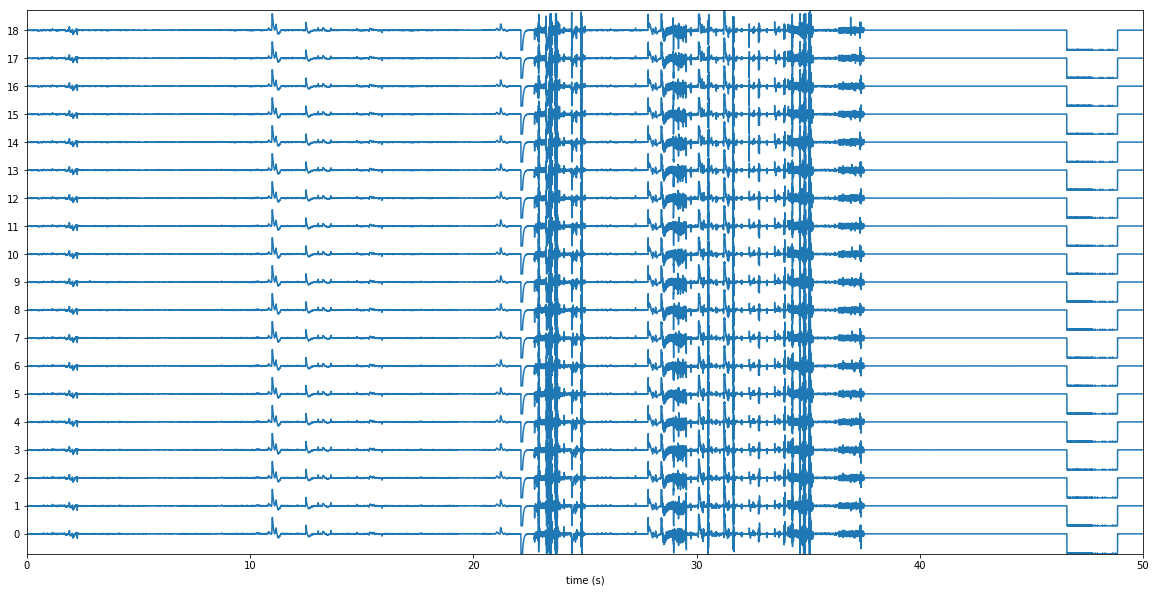

In [151]:
signals = np.load(filename).T
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=1)

In [1]:
signals[0][34]

NameError: name 'signals' is not defined

In [153]:
 a = np.hstack(signals[0])

(array([   22.,     0.,    14.,     0.,    19.,     0.,     0.,    16.,
            0.,    22.,     0.,    11.,     0.,     0.,    15.,     0.,
           15.,     0.,    35.,     0.,     0.,    34.,     0.,    50.,
            0.,    64.,     0.,     0.,    63.,     0.,    54.,     0.,
           60.,     0.,     0.,    60.,     0.,    75.,     0.,   114.,
            0.,     0.,   106.,     0.,   100.,     0.,     0.,  1213.,
            0.,    73.,     0.,    61.,     0.,     0.,    69.,     0.,
           72.,     0.,    37.,     0.,     0.,    30.,     0.,    20.,
            0.,    25.,     0.,     0.,    20.,     0.,    17.,     0.,
           17.,     0.,     0.,    17.,     0.,     8.,     0.,    16.,
            0.,     0.,    22.,     0.,    19.,     0.,    11.,     0.,
            0.,    24.,     0.,    16.,     0.,    20.]),
 array([-20.        , -19.57446809, -19.14893617, -18.72340426,
        -18.29787234, -17.87234043, -17.44680851, -17.0212766 ,
        -16.59574468, 

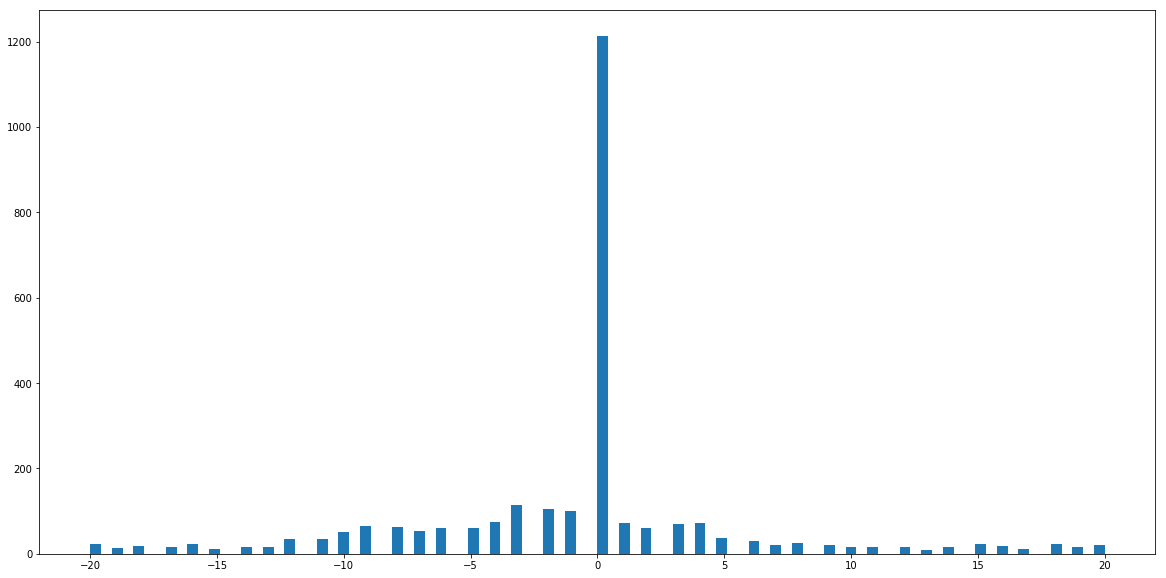

In [294]:
plt.hist(a, bins="auto",range=(-20,20))

#### A Fake EEG

In [276]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-"+ str(8) + "-fake-rG-cont.npy"

In [298]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/" +"generated-" + str(0) + "-fake-rG-long.npy"

In [307]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-3-fake-rG-short-fact.npy"

In [314]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(29) + "-fake-rcG-short.npy"

In [347]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(2) + "-fake-cG-matching-minB.npy"

In [9]:
filename = "/Users/DanielLongo 1/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(2) + "-fake-conv-A.npy"

In [173]:
filename = "/Users/DanielLongo 1/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(2) + "-fake-conv-wgp.npy"

In [233]:
filename = "/Users/DanielLongo 1/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(8) + "-fake-conv-impro.npy"

In [ ]:
filename = "/Users/DanielLongo 1/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(8) + "-fake-conv-impro.npy"

In [237]:
epoch = 30

In [238]:
cleaned_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(epoch) + "-cleaned-conv-add.npy"

In [239]:
fake_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(epoch) + "-fake-conv-add.npy"

In [240]:
estimated_filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(epoch) + "-estimated-conv-add.npy"

In [241]:
cleaned_signals = np.load(cleaned_filename).T
fake_signals = np.load(fake_filename).T
estimated_signals = np.load(estimated_filename).T

In [245]:
estimated_signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp].shape

(19, 0)

In [246]:
estimated_signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp].shape

(19, 0)

Original Estimated

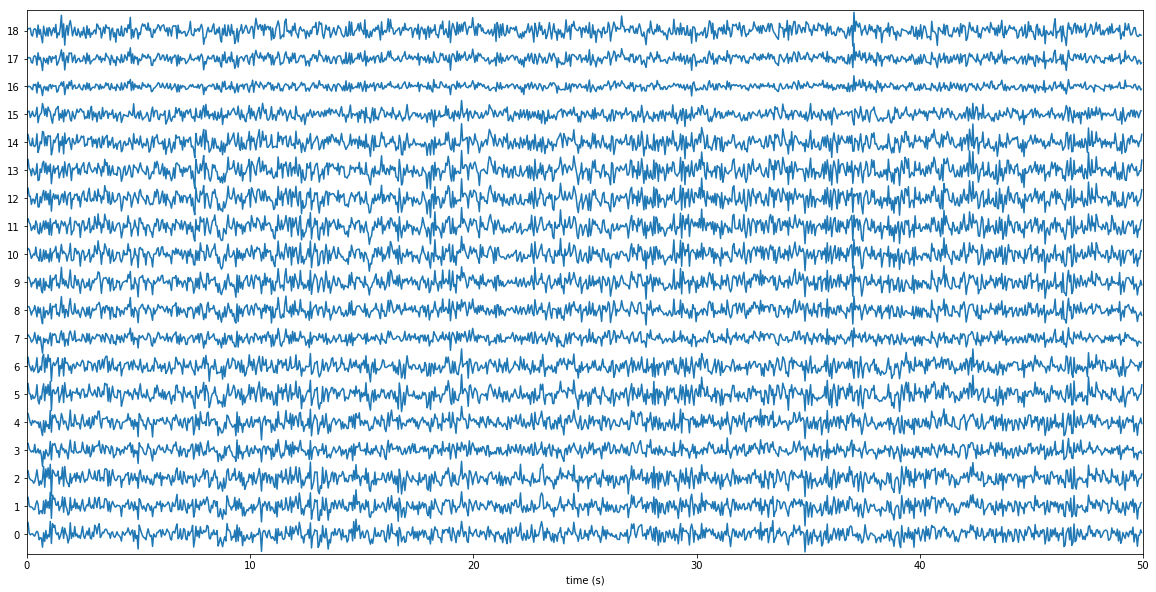

In [247]:
stacklineplot.stackplot(estimated_signals[ch0:ch1,:],seconds=DE*10.0, ylabels=electrode_labels, yscale=1)

With Noise

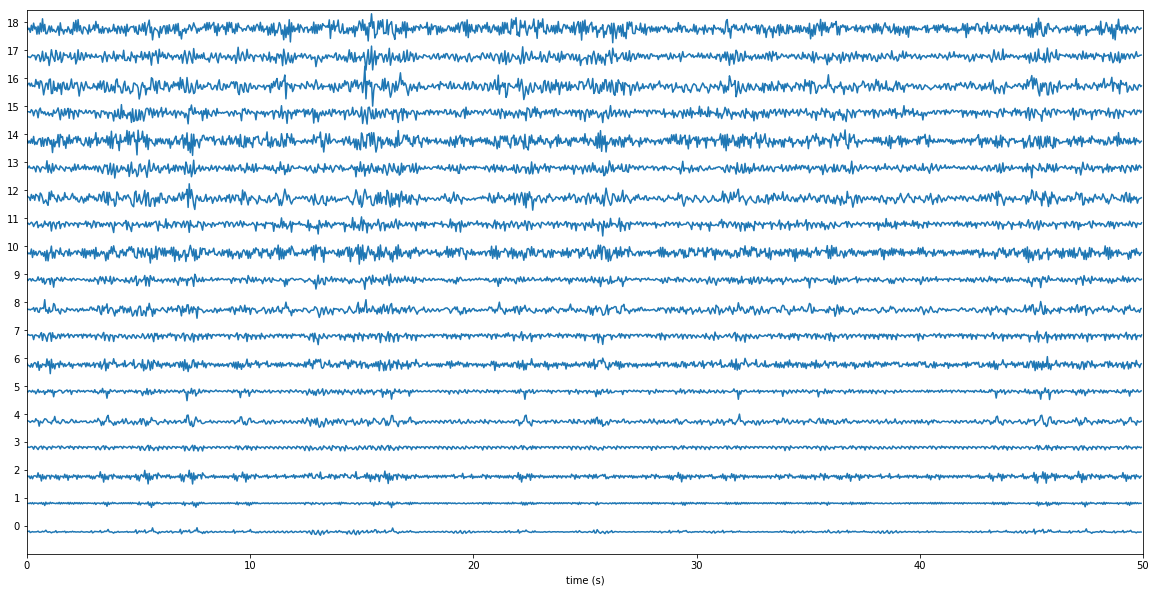

In [249]:
stacklineplot.stackplot(fake_signals[ch0:ch1,:],seconds=DE*10.0, ylabels=electrode_labels, yscale=1)

Cleaned

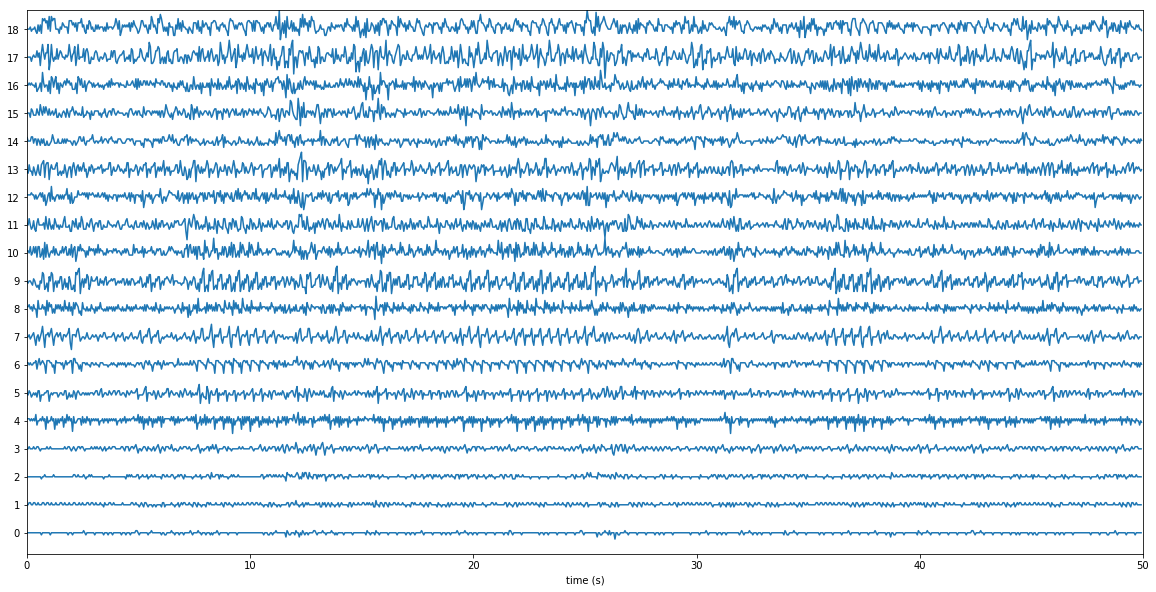

In [250]:
stacklineplot.stackplot(cleaned_signals[ch0:ch1,:],seconds=DE*10.0, ylabels=electrode_labels, yscale=1)

(array([   1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    2.,    0.,    5.,
           3.,    1.,    4.,    7.,    6.,   11.,    8.,   16.,   19.,
          41.,   54.,   76.,  117.,   96.,   92.,  103.,   99.,   69.,
          51.,   31.,   29.,   13.,   13.,   10.,    5.,    4.,    4.,
           2.,    0.,    1.,    0.,    0.,    1.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    2.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([ -5.22517483e-04,  -5.10505931e-04,  -4.98494380e-04,
         -4.86482829e-04,  -4.74471278e-04,  -4.62459726e-04,
         -4.50448175e-04,  -4.38436624e-04,  -4.26425072e-04,
         -4.14413521e-04,  -4.02401970e-04,  -3.90390419e-04,
         -3.78378867e-04,  -3.66367316e-04,  -3.54355765e-04,
         -3.42344213e-04,  -3.30332662e-04,  -3.18321111e-04,
 

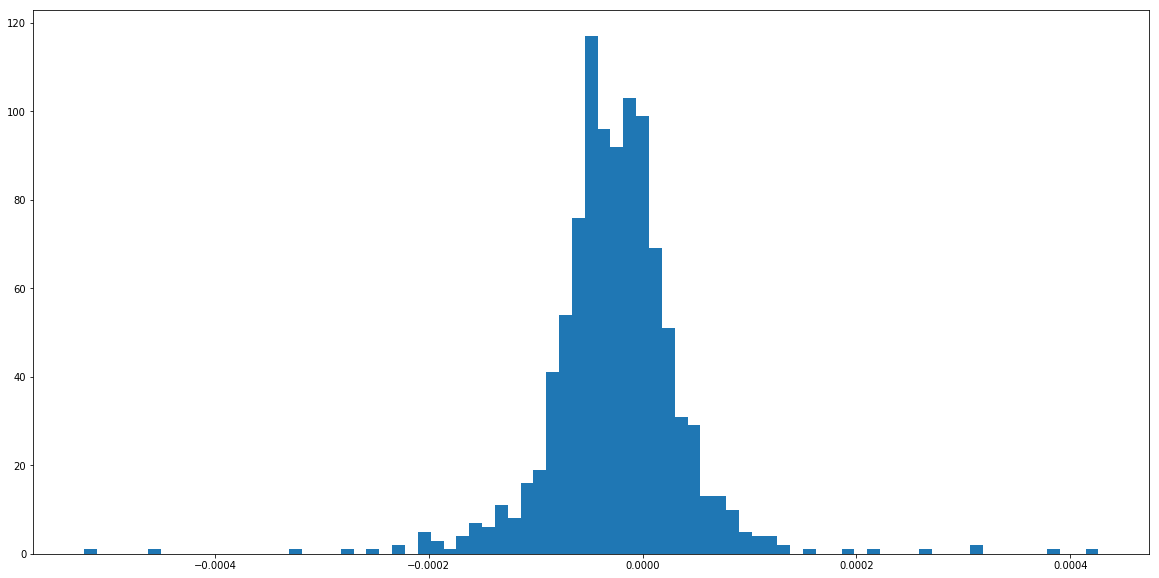

In [232]:
plt.hist(np.hstack(signals[0]), bins="auto")

With norm

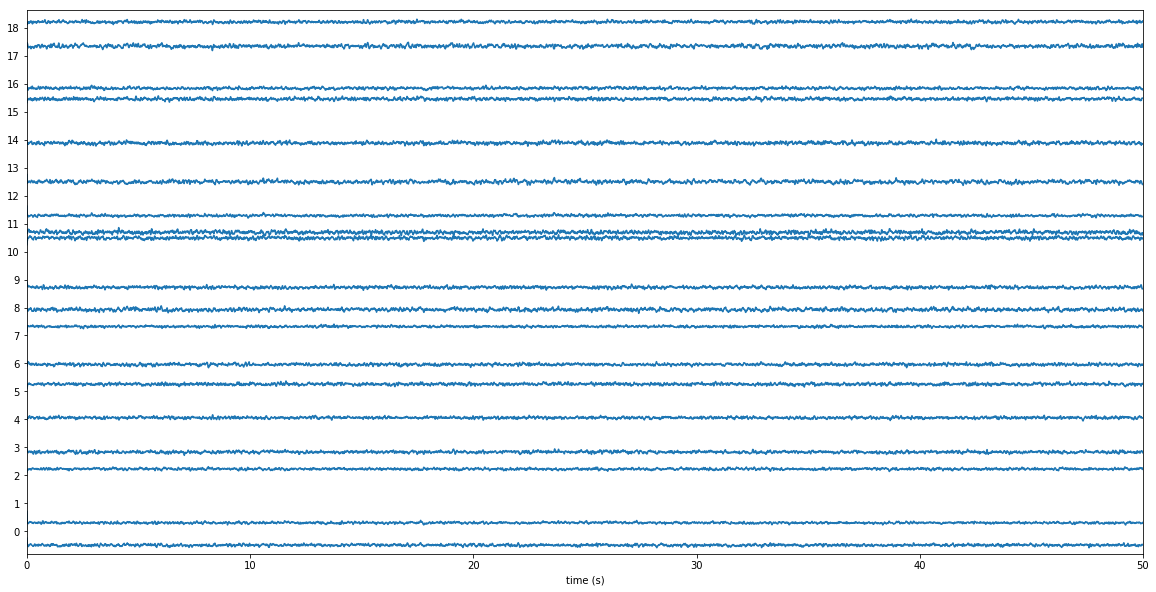

In [252]:
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=1)

In [195]:
filename = "/Users/DanielLongo/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf"
# filename = "/Users/DanielLongo 1/Desktop/eegML/eeg-hdfstorage/data/spasms.eeghdf"

# "/Users/DanielLongo 1/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf"

In [196]:
open(filename)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/DanielLongo/server/mnt/data1/eegdbs/SEC-0.1/stanford/ZA00701S_1-1+.eeghdf'

In [17]:
signals = load_eeg_file(filename)

In [19]:
signals

<HDF5 dataset "signals": shape (36, 446000), type "<i2">

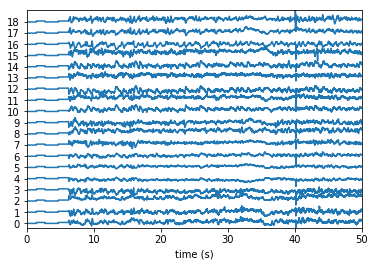

In [29]:
stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=2)

### Old

In [ ]:
filename = "/Users/DanielLongo/server/mnt/home2/dlongo/eegML/generated_eegs/generated-" + str(i) + suffix + ".npy"

In [90]:
hf = h5py.File('data1.h5', 'w')

In [91]:
signals = hf.create_dataset('generated', data=generated)

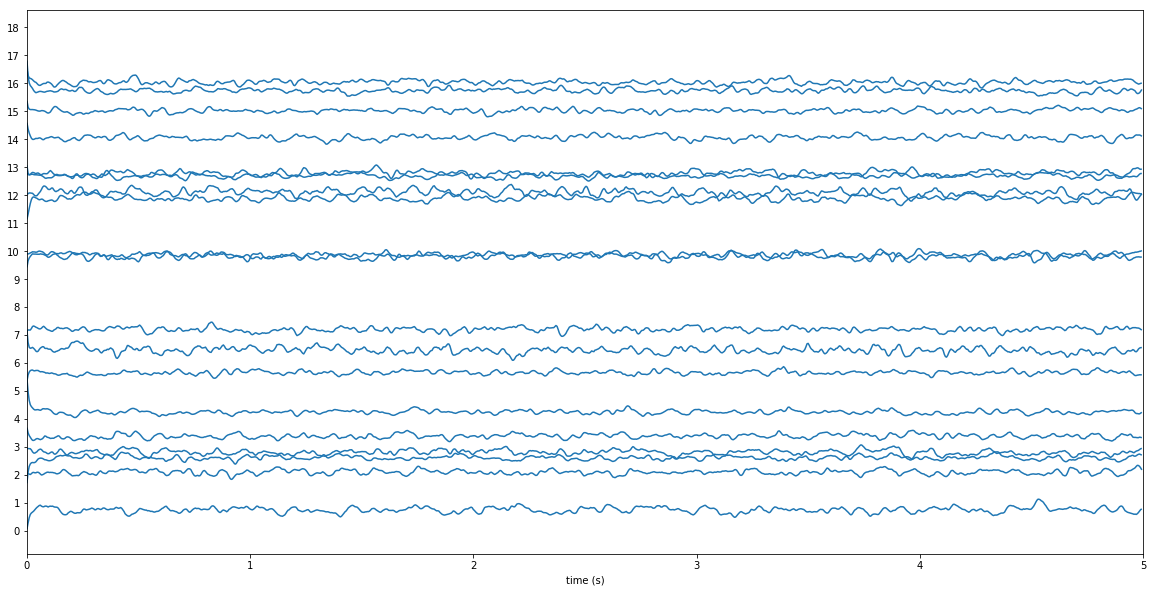

In [92]:
stacklineplot.show_epoch_centered(signals, 0,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=200,
                        ylabels=list(range(n_sensors)), yscale=3.0)